<a href="https://colab.research.google.com/github/avantika-14/python-project/blob/main/Telecom_Customer_Churn_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a Machine Learning Classification Problem

**Dataset Attributes:**
* **customerID:** Customer ID
* **gender:** Whether the customer is a male or a female
* **SeniorCitizen:** Whether the customer is a senior citizen or not (1, 0)
* **Partner:** Whether the customer has a partner or not (Yes, No)
* **Dependents:** Whether the customer has dependents or not (Yes, No)
* **tenure:** Number of months the customer has stayed with the company
* **PhoneService:** Whether the customer has a phone service or not (Yes, No)
* **MultipleLines:** Whether the customer has multiple lines or not (Yes, No, No phone service)
* **InternetService:** Customer’s internet service provider (DSL, Fiber optic, No)
* **OnlineSecurity:** Whether the customer has online security or not (Yes, No, No internet service)
* **OnlineBackup:** Whether the customer has online backup or not (Yes, No, No internet service)
* **DeviceProtection:** Whether the customer has device protection or not (Yes, No, No internet service)
* **TechSupport:** Whether the customer has tech support or not (Yes, No, No internet service)
* **StreamingTV:** Whether the customer has streaming TV or not (Yes, No, No internet service)
* **StreamingMovies:** Whether the customer has streaming movies or not (Yes, No, No internet service)
* **Contract:** The contract term of the customer (Month-to-month, One year, Two year)
* **PaperlessBilling:** Whether the customer has paperless billing or not (Yes, No)
* **PayementMethod:** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* **MonthlyCharges:** The amount charged to the customer monthly
* **TotalCharges:** The total amount charged to the customer
* **Churn:** Whether the customer churned or not (Yes or No)







**Exploratory Data Analysis**

In [12]:
import pandas as pd
dataset=pd.read_csv("/content/Telco-Customer-Churn.csv")
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
dataset.drop(["customerID"],axis=1,inplace=True) #because it has nothing to do with the churn
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [17]:
col=dataset.columns

1. Target Variable - **churn** - to analyse what are the things present in churn


In [18]:
dataset.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

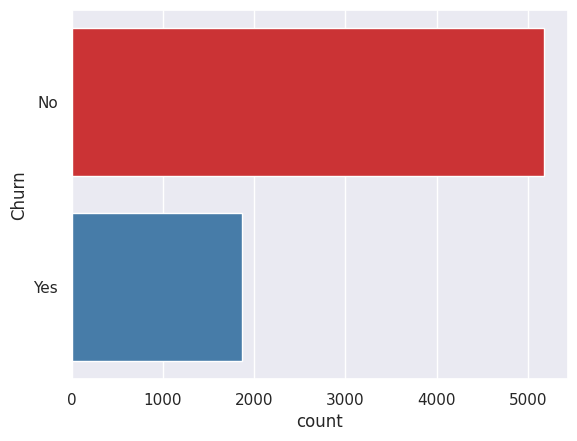

In [19]:
import seaborn as sns
sns.set_theme(style="darkgrid",palette="Set1")
ax=sns.countplot(y="Churn",data=dataset,orient="h")

**we can conclude here that:** there is imbalance in target variable because there are nearly 5000 people with no and almost 2000 with yes

2. Categorical Feature

In [20]:
dataset.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
categorical_features=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                     'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                     'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',]

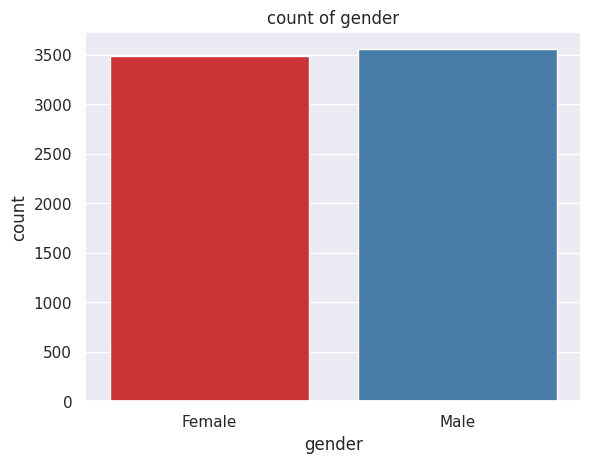

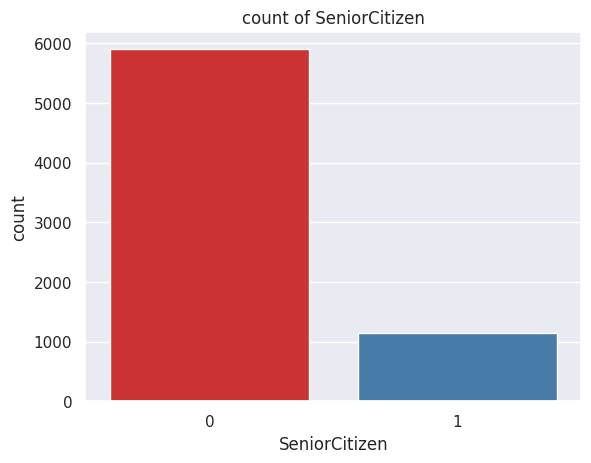

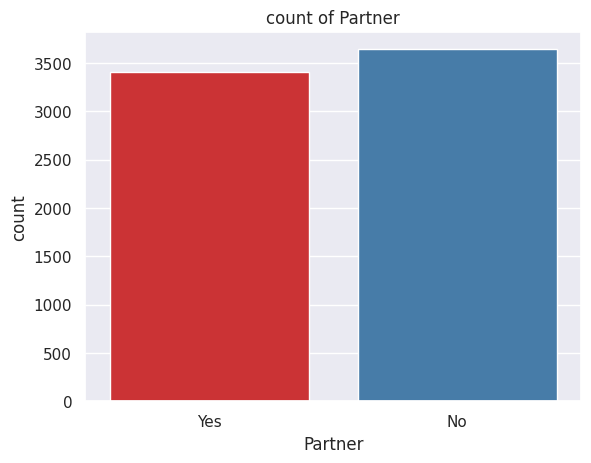

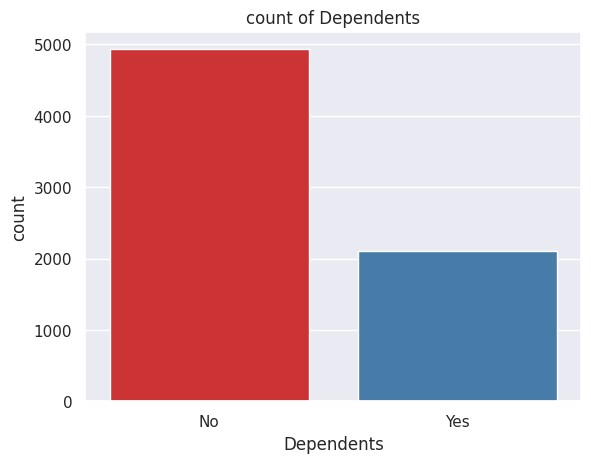

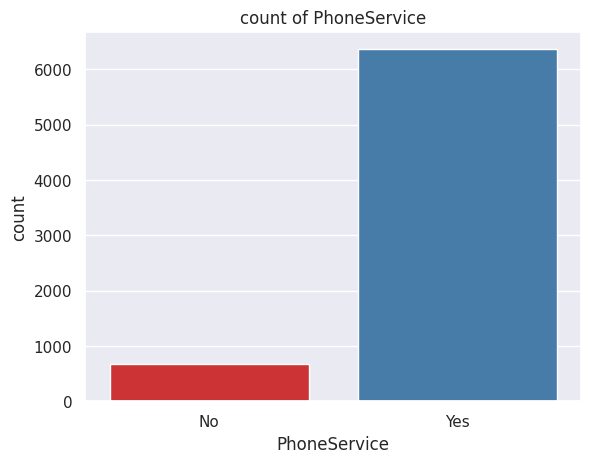

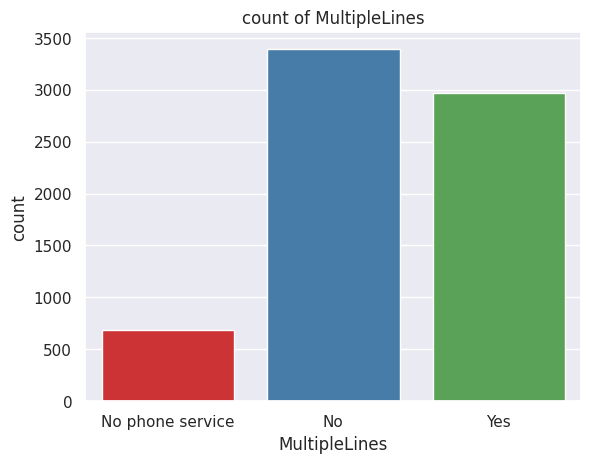

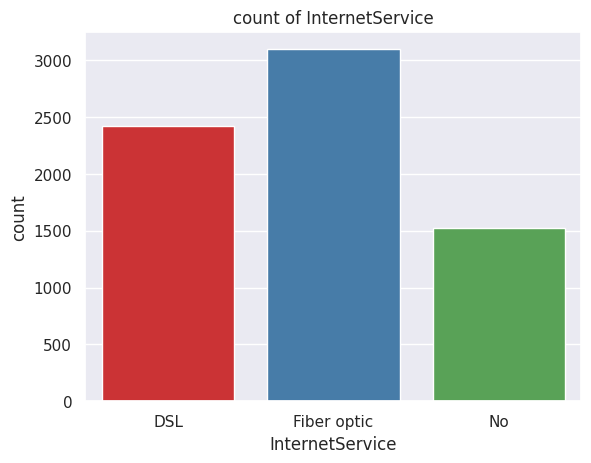

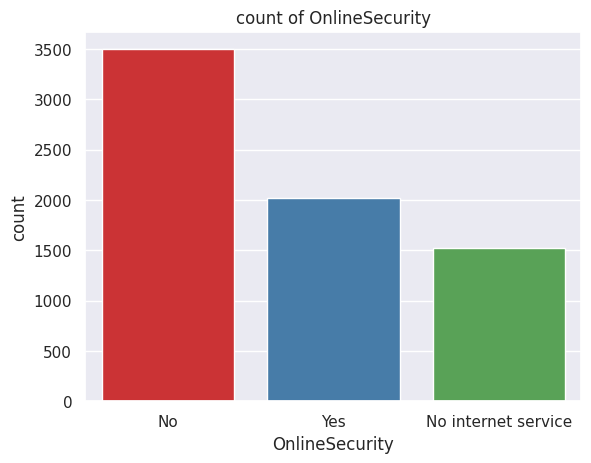

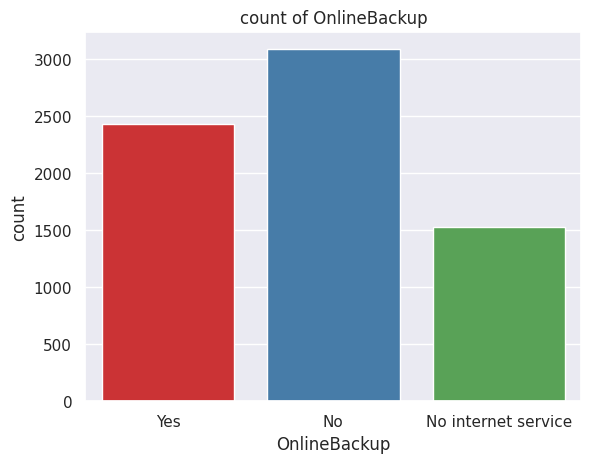

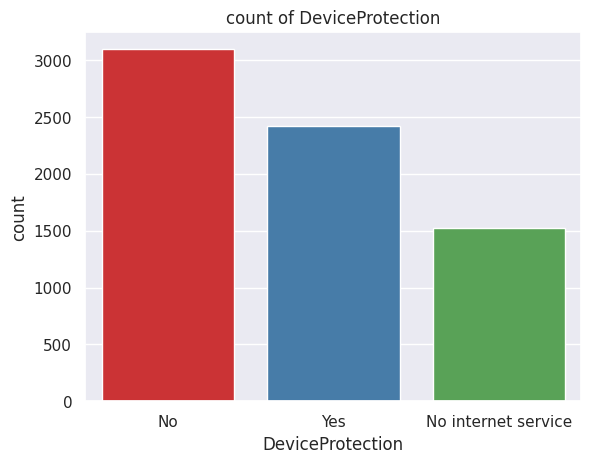

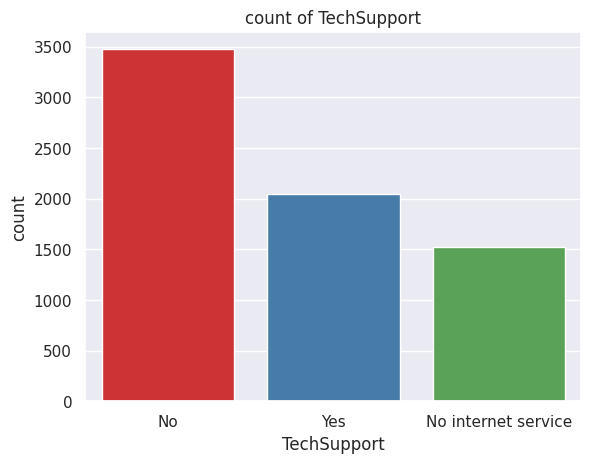

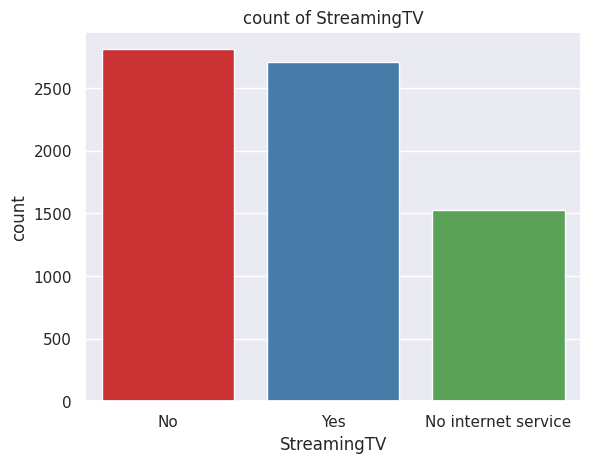

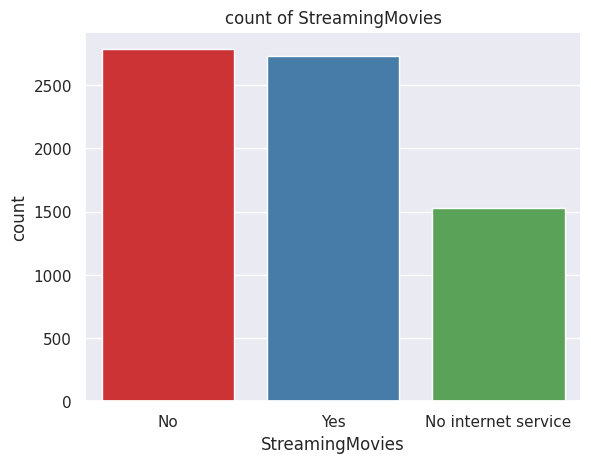

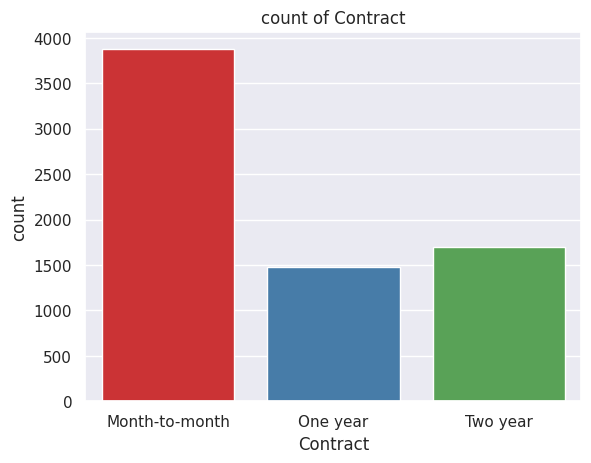

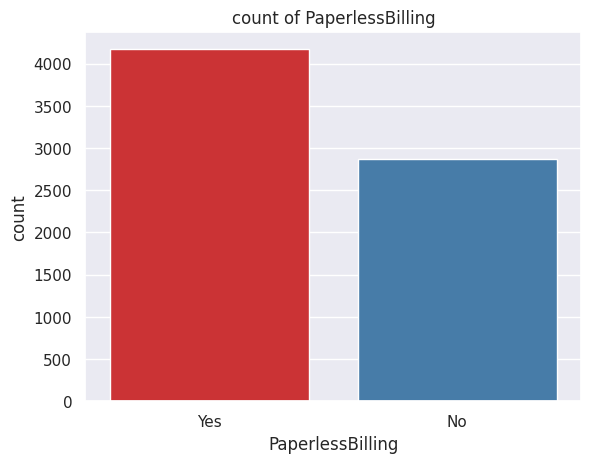

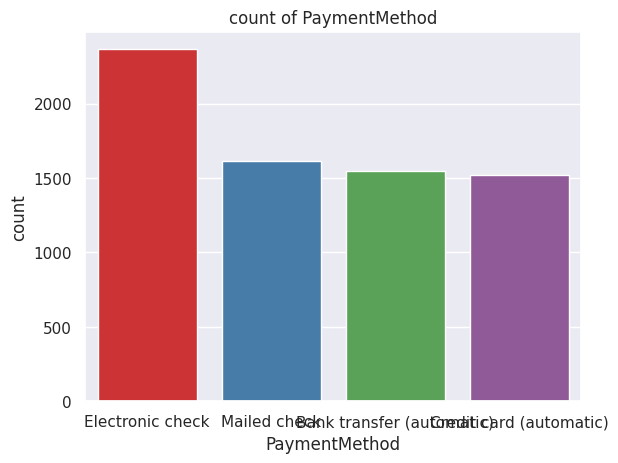

In [33]:
import matplotlib.pyplot as plt
for c in categorical_features:
  plt.figure
  sns.countplot(x=c,data=dataset)
  plt.title(f"count of {c}")
  plt.show()
  print("""
  
  """)

here we realise that churn doesn't depend on gender

**Senior Citizens**

In [37]:
sc=dataset.groupby("SeniorCitizen")["Churn"].value_counts().to_frame()
sc=sc.rename({"Churn":"No Of Customers"},axis=1).reset_index()

In [38]:
sc.head()

,SeniorCitizen,Churn,No Of Customers
0,0,No,4508
1,0,Yes,1393
2,1,No,666
3,1,Yes,476


In [39]:
sc["Percentage of Customers"]=sc["No Of Customers"]/sc["No Of Customers"].sum()*100
sc

,SeniorCitizen,Churn,No Of Customers,Percentage of Customers
0,0,No,4508,64.006815
1,0,Yes,1393,19.778503
2,1,No,666,9.456198
3,1,Yes,476,6.758484


In [42]:
senior=sc[sc["SeniorCitizen"]==1]["No Of Customers"]
senior=senior/senior.values.sum()*100
senior

2    58.318739
3    41.681261
Name: No Of Customers, dtype: float64

<Axes: xlabel='SeniorCitizen', ylabel='Percentage of Customers'>

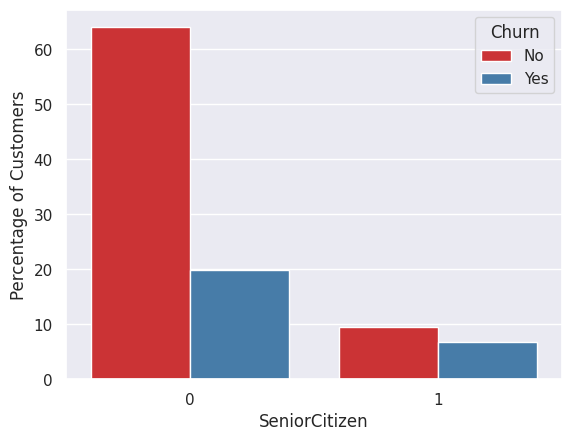

In [43]:
sns.barplot(x="SeniorCitizen",y="Percentage of Customers",hue="Churn",data=sc)



*   Among the total count of Senior Citizens the churning rate is almsot half of it
*  But so is not the case in non-senior citizens
*  **Conclusion:** Senior citizens have a churn rate of 42% compared to non-senior citizens






**Partners and Dependents**

<Axes: title={'center': 'Has Dependents'}, xlabel='Dependents', ylabel='percentage of customers'>

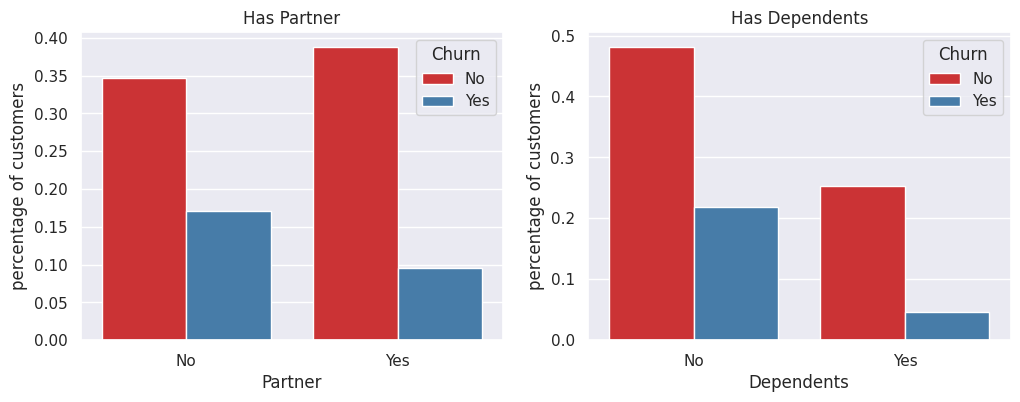

In [48]:
fig, axis=plt.subplots(1,2,figsize=(12,4))
axis[0].set_title("Has Partner")
axis[1].set_title("Has Dependents")
y_axis="percentage of customers"
partner=dataset.groupby("Partner")["Churn"].value_counts()/len(dataset)
partner=partner.to_frame().rename({"Churn":y_axis},axis=1).reset_index()
sns.barplot(x='Partner',y=y_axis,hue='Churn',data=partner,ax=axis[0])
dependents=dataset.groupby("Dependents")["Churn"].value_counts()/len(dataset)
dependents=dependents.to_frame().rename({"Churn":y_axis},axis=1).reset_index()
sns.barplot(x='Dependents',y=y_axis,hue='Churn',data=dependents,ax=axis[1])


**Conclusion:** Customers with no dependents, partners are likely to churn

In [49]:
def visual_percentage(column):
  p=dataset.groupby(column)["Churn"].value_counts().to_frame()
  p=p.rename({"Churn":"No Of Customers"},axis=1).reset_index()
  p["Percentage of Customers"]=p["No Of Customers"]/p["No Of Customers"].sum()*100
  sns.barplot(x=column,y="Percentage of Customers",hue="Churn",data=p)

**Phone Services**

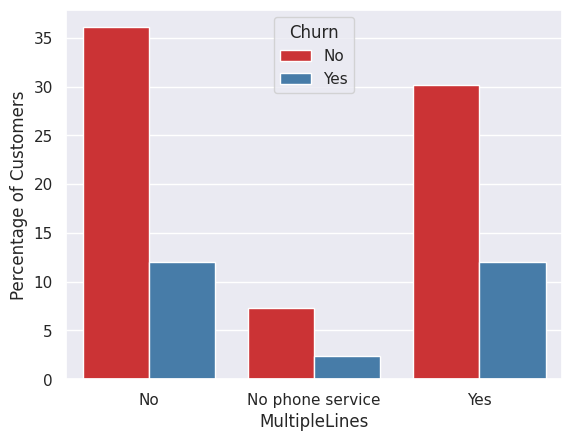

In [50]:
visual_percentage("MultipleLines")

**Conclusion:** Customers with multiple lines have higher rate of churns

**Internet Services**

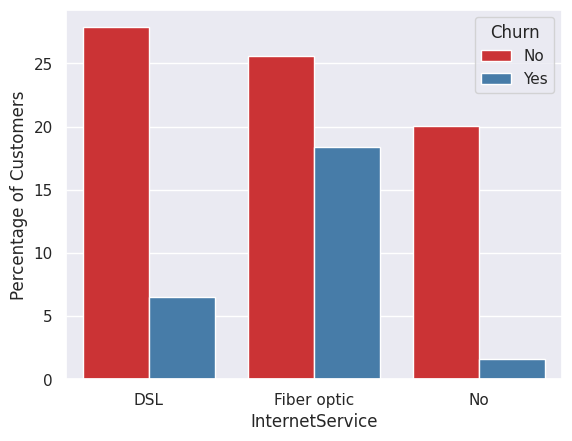

In [51]:
visual_percentage("InternetService")

**Conclusion:**
*   Customers with fibre optics internet cable are likely to churn
*   customers with no internet are less likely to churn


**There are additional services for customers with internet services**

In [57]:
add_services=['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

Text(0, 0.5, 'No Of Customers')

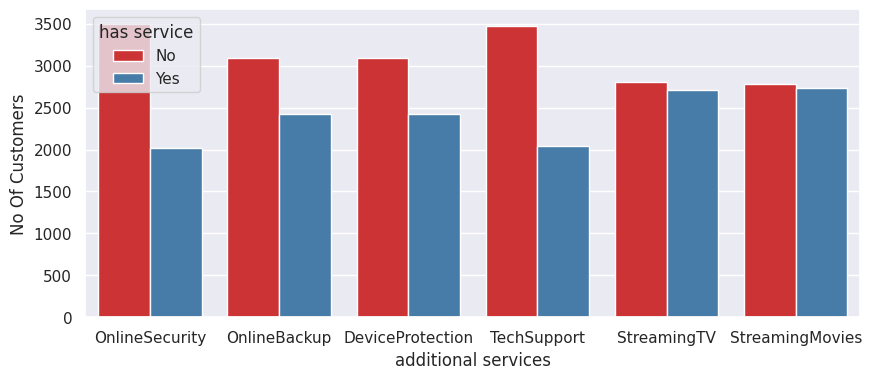

In [61]:
melted=pd.melt(dataset[dataset['InternetService']!="No"][add_services]).rename({'value':'has service'},axis=1)
plt.figure(figsize=(10,4))
sns.countplot(data=melted,x='variable',hue='has service')
plt.xlabel('additional services')
plt.ylabel('No Of Customers')


Text(0, 0.5, 'No Of Churns')

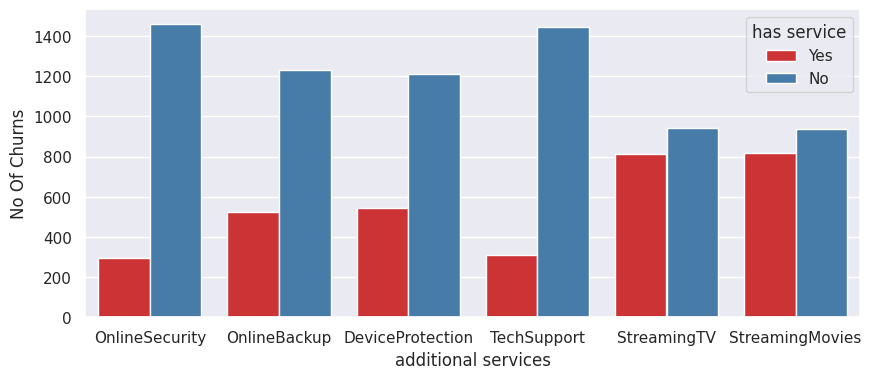

In [64]:
melted=dataset[(dataset.InternetService!="No") & (dataset.Churn=="Yes")]
melted=pd.melt(melted[add_services]).rename({'value':'has service'},axis=1)
plt.figure(figsize=(10,4))
sns.countplot(data=melted,x='variable',hue='has service')
plt.xlabel('additional services')
plt.ylabel('No Of Churns')

**Conclusion:** Customers with Online Security, Online Backup, Device Protection and Tech Support are unlikely to churn

**Contract and Payement**

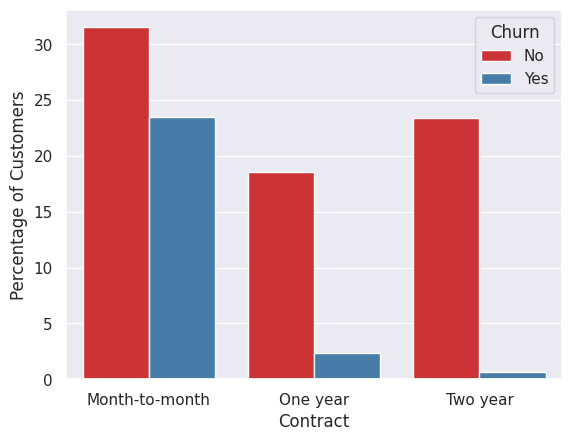

In [65]:
visual_percentage('Contract')

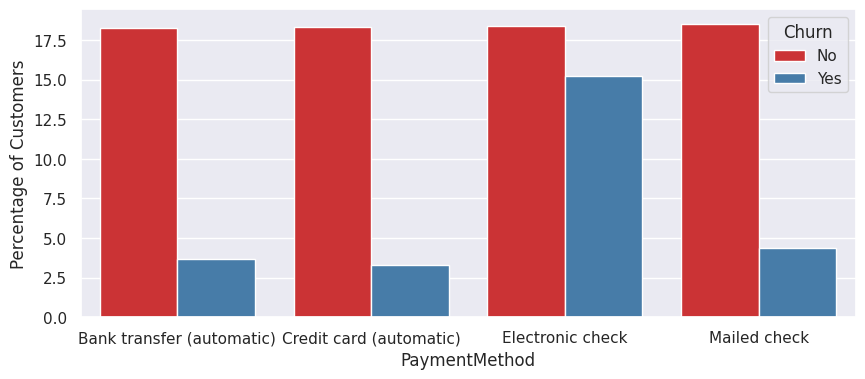

In [67]:
plt.figure(figsize=(10,4))
visual_percentage('PaymentMethod')

**Conclusion:** Month-to-Month and Electronic check customers are more likely to churn

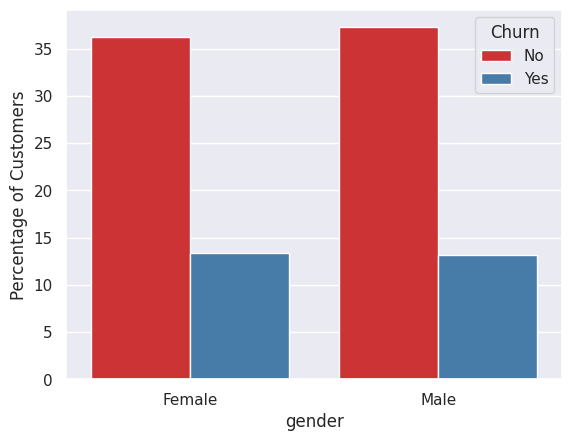

In [68]:
visual_percentage('gender')

**Conclusions:** Gender doesnot determine the churns

**Numerical Features**

In [71]:
dataset['TotalCharges']=dataset['TotalCharges'].replace(" ",0).astype('float32') #converting empty spaces with 0

In [76]:
def kdeplot(feature):
  plt.figure(figsize=(9,4))
  plt.title("KDE for {}".format(feature))
  ax0=sns.kdeplot(dataset[dataset['Churn']=='No'][feature],label='Churn: No')
  ax1=sns.kdeplot(dataset[dataset['Churn']=='Yes'][feature],label='Churn: Yes')


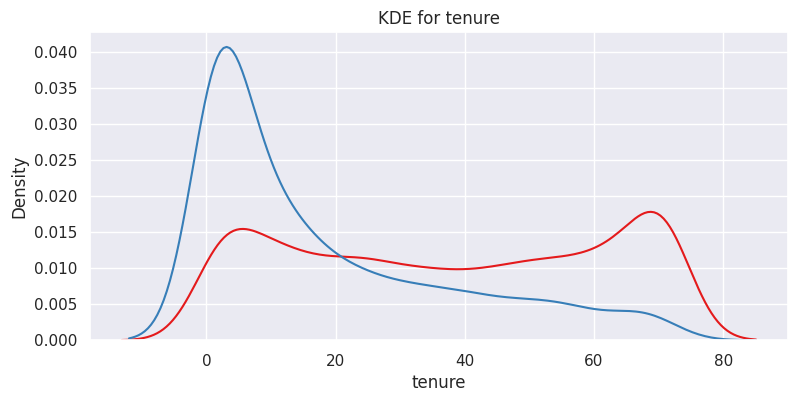

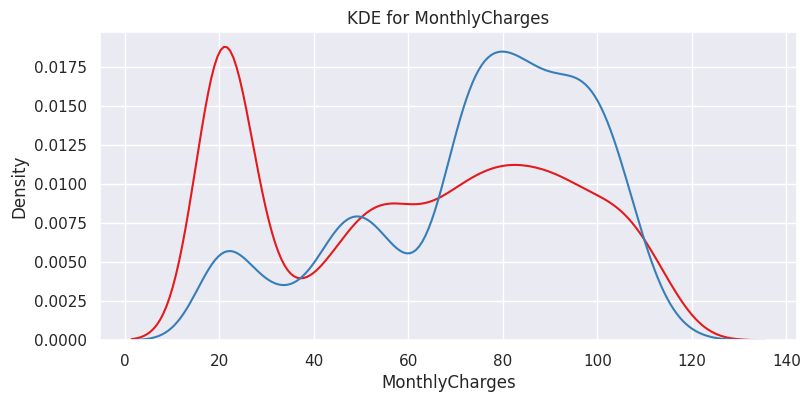

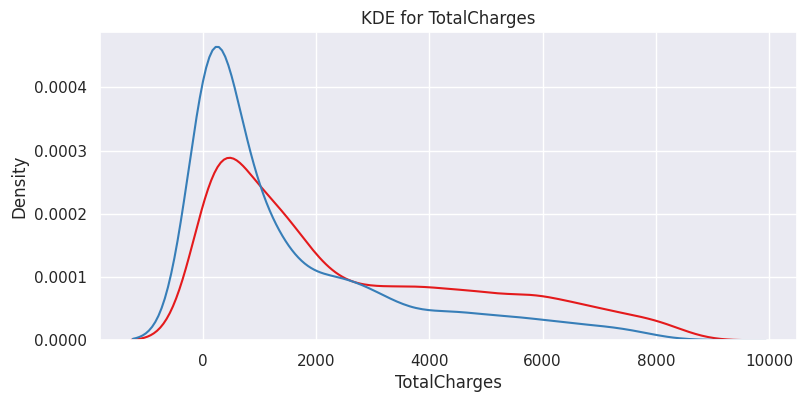

In [79]:
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

**Observations**

<Axes: xlabel='MonthlyCharges', ylabel='tenure'>

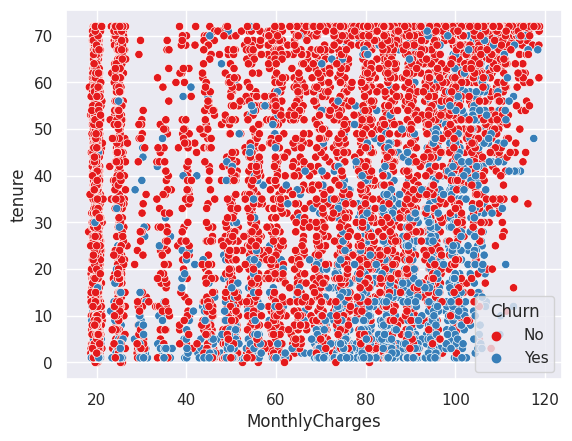

In [81]:
sns.scatterplot(y='tenure',x='MonthlyCharges',data=dataset,hue="Churn")

<Axes: xlabel='TotalCharges', ylabel='tenure'>

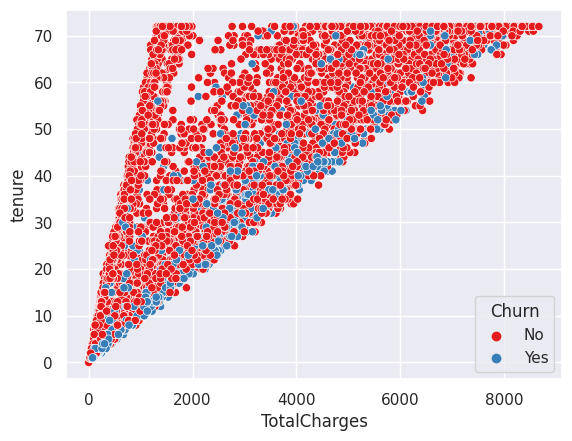

In [82]:
sns.scatterplot(y='tenure',x='TotalCharges',data=dataset,hue="Churn")

As the tenure increases they are less likely to churn

**Data Preprocessing**

In [96]:
dataset.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [85]:
x=dataset.drop(["Churn"],axis=1)
y=dataset["Churn"]

In [87]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x["tenure"]=scale.fit_transform(x[["tenure"]])
x["TotalCharges"]=scale.fit_transform(x[["TotalCharges"]])
x["MonthlyCharges"]=scale.fit_transform(x[["MonthlyCharges"]])
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,0.013889,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,0.003437
1,Male,0,No,No,0.472222,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.385075,0.217564
2,Male,0,No,No,0.027778,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,0.012453
3,Male,0,No,No,0.625000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.239303,0.211951
4,Female,0,No,No,0.027778,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,0.017462


In [88]:
x[categorical_features].head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [91]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for c in categorical_features:
  encoder.fit(x[c])
  x[c]=encoder.transform(x[c])
  mapping=dict(zip(encoder.classes_,encoder.transform(encoder.classes_)))
  print(c,":",mapping)

gender : {0: 0, 1: 1}
SeniorCitizen : {0: 0, 1: 1}
Partner : {'No': 0, 'Yes': 1}
Dependents : {'No': 0, 'Yes': 1}
PhoneService : {'No': 0, 'Yes': 1}
MultipleLines : {'No': 0, 'No phone service': 1, 'Yes': 2}
InternetService : {'DSL': 0, 'Fiber optic': 1, 'No': 2}
OnlineSecurity : {'No': 0, 'No internet service': 1, 'Yes': 2}
OnlineBackup : {'No': 0, 'No internet service': 1, 'Yes': 2}
DeviceProtection : {'No': 0, 'No internet service': 1, 'Yes': 2}
TechSupport : {'No': 0, 'No internet service': 1, 'Yes': 2}
StreamingTV : {'No': 0, 'No internet service': 1, 'Yes': 2}
StreamingMovies : {'No': 0, 'No internet service': 1, 'Yes': 2}
Contract : {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
PaperlessBilling : {'No': 0, 'Yes': 1}
PaymentMethod : {'Bank transfer (automatic)': 0, 'Credit card (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3}


In [94]:
y=encoder.fit_transform(y) 
mapping=dict(zip(encoder.classes_,encoder.transform(encoder.classes_))) 
print(mapping)

{0: 0, 1: 1}


In [95]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.003437
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.217564
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.012453
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.211951
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.017462


In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)
x_train.shape,y_test.shape

((4930, 19), (2113,))

In [101]:
from sklearn.feature_selection import SelectKBest,f_classif
select=SelectKBest(f_classif,k=6)
select.fit(x_train,y_train)

SelectKBest(k=6)

In [102]:
x_train.columns[select.get_support()]

Index(['tenure', 'OnlineSecurity', 'TechSupport', 'Contract',
       'PaperlessBilling', 'MonthlyCharges'],
      dtype='object')

In [104]:
x_train_selected=x_train[x_train.columns[select.get_support()]]

In [105]:
x_test_selected=x_test[x_train.columns[select.get_support()]]

**Modelling**

1. Decision Tree Classifier

In [106]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier(class_weight='balanced')
model1.fit(x_train_selected,y_train)
ans1=model1.predict(x_test_selected)

In [109]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,ans1)
score

0.7359204921911974

<Axes: >

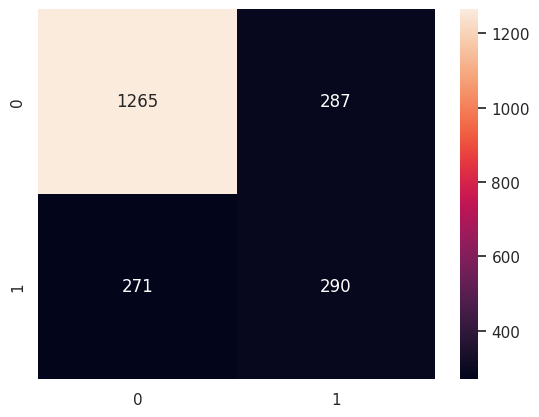

In [111]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ans1)
sns.heatmap(cm,annot=True,fmt='g')

2. Random Forest Classifier

In [115]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(class_weight='balanced')
model2.fit(x_train_selected,y_train)
ans2=model1.predict(x_test_selected)

In [116]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,ans1)
score

0.7359204921911974

<Axes: >

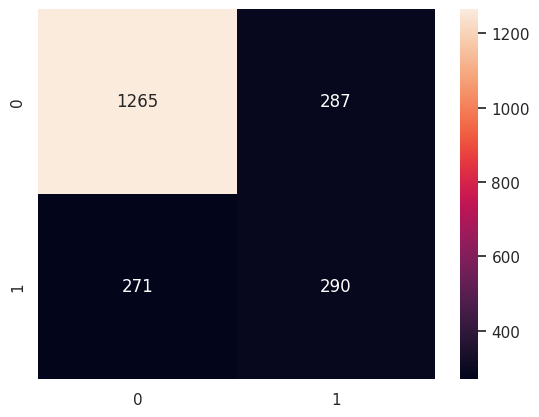

In [117]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ans2)
sns.heatmap(cm,annot=True,fmt='g')

3. Support Vector Machine

In [118]:
from sklearn.svm import SVC
model3=SVC(class_weight='balanced')
model3.fit(x_train_selected,y_train)
ans3=model1.predict(x_test_selected)

In [119]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,ans3)
score

0.7359204921911974

<Axes: >

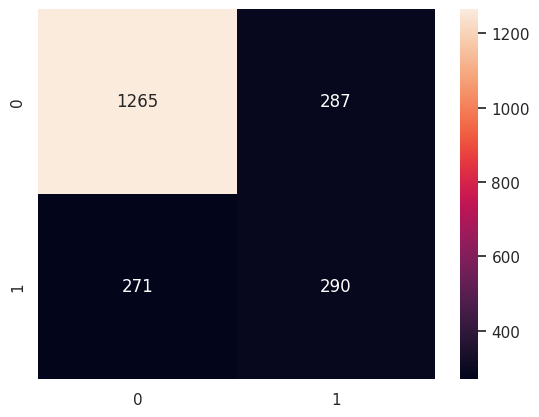

In [120]:
from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(y_test,ans3) 
sns.heatmap(cm,annot=True,fmt='g')

4. XGBoost

In [123]:
from xgboost import XGBClassifier
model4=XGBClassifier(class_weight='balanced')
model4.fit(x_train_selected,y_train)
ans4=model1.predict(x_test_selected)

[16:38:33] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.



In [124]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,ans4)
score

0.7359204921911974

<Axes: >

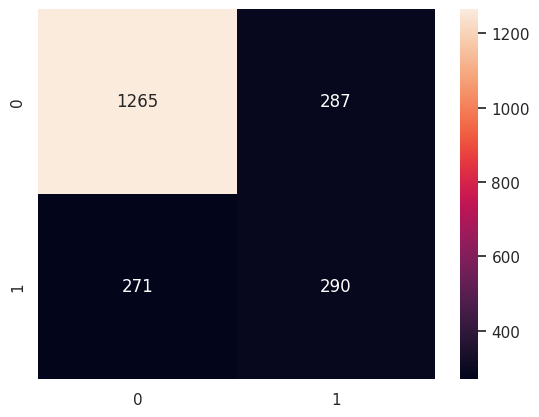

In [125]:
from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(y_test,ans4) 
sns.heatmap(cm,annot=True,fmt='g')

**Building a Predictive System**

In [126]:
features=['tenure','OnlineSecurity','TechSupport','Contract','PaperlessBilling','MonthlyCharges']
print(mapper)

[]


In [127]:
inputs=[]
for f in features:
  f=int(input(f"enter {f}: "))
  inputs.append(f)

enter tenure: 2
enter OnlineSecurity: 4
enter TechSupport: 5
enter Contract: 4
enter PaperlessBilling: 5
enter MonthlyCharges: 4


In [128]:
import numpy as np
i_array=np.array(inputs)
i_array=i_array.reshape(1,-1)
answer=model2.predict(i_array)
print(answer)
if answer[0]==0:
  print("chances of churn: no")
else:
  print("chances of churn: yes")

[0]
chances of churn: no


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
